In [1]:
pip install numpy matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



 Multipartite Entanglement Simulator



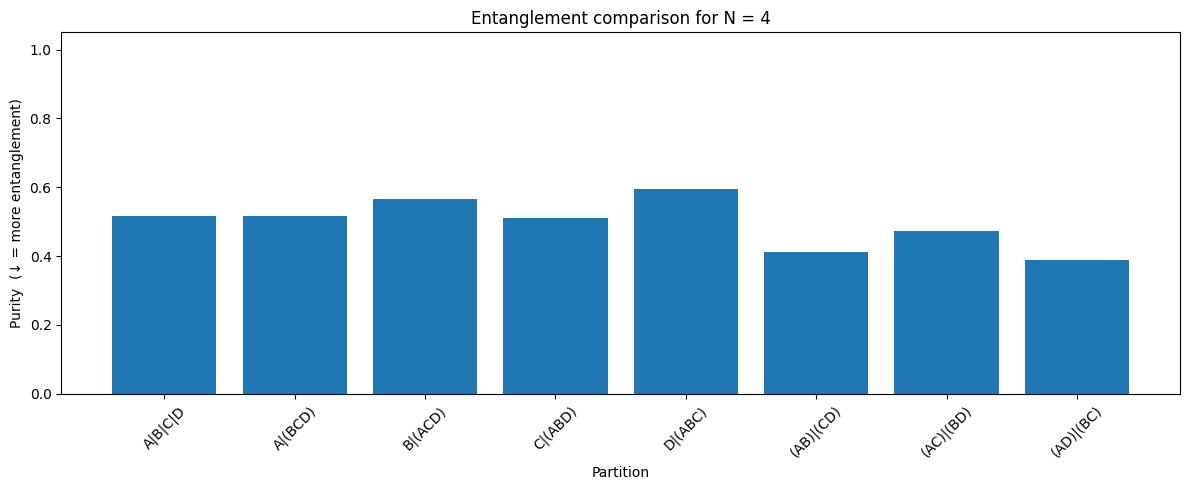

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import string



def product_state(probabilities):
    psi = probabilities[0]
    for p in probabilities[1:]:
        psi = np.tensordot(psi, p, axes=0)
    return np.sqrt(psi)

def apply_phases(psi, phase_tensor):
    return psi * np.exp(1j * phase_tensor)

def density_matrix(psi):
    psi_flat = psi.flatten()
    rho = np.outer(psi_flat, psi_flat.conj())
    return rho.reshape(psi.shape + psi.shape)

def partial_trace(rho, keep, dims):
    n = len(dims)
    trace_out = [i for i in range(n) if i not in keep]
    reshaped = rho

    for i in reversed(trace_out):
        reshaped = np.trace(
            reshaped,
            axis1=i,
            axis2=i + reshaped.ndim // 2
        )

    d = int(np.prod([dims[i] for i in keep]))
    return reshaped.reshape(d, d)

def purity(rho):
    return np.real(np.trace(rho @ rho))



def partitions_human(n):
    labels = list(string.ascii_uppercase[:n])
    dims = [2] * n

    partitions = []

    # Fully local: A|B|C|...
    partitions.append((
        [[i] for i in range(n)],
        "|".join(labels)
    ))

    # Single vs rest: A|(BC...), etc.
    for i in range(n):
        left = [i]
        right = [j for j in range(n) if j != i]
        label = f"{labels[i]}|({''.join(labels[j] for j in right)})"
        partitions.append(([left, right], label))

    # Balanced splits for N >= 4
    if n >= 4:
        seen = set()
        for r in range(2, n//2 + 1):
            for combo in itertools.combinations(range(n), r):
                rest = tuple(i for i in range(n) if i not in combo)
                key = (combo, rest)
                if key in seen or (rest, combo) in seen:
                    continue
                seen.add(key)

                left = list(combo)
                right = list(rest)
                label = f"({''.join(labels[i] for i in left)})|({''.join(labels[i] for i in right)})"
                partitions.append(([left, right], label))

    return partitions



def run():
    print("\n Multipartite Entanglement Simulator\n")
    n = int(input("Enter number of subsystems (2, 3, 4, ...): "))

    dims = [2] * n
    probabilities = [np.ones(2)/2 for _ in range(n)]

    psi = product_state(probabilities)
    phases = 2 * np.pi * np.random.rand(*psi.shape)
    psi = apply_phases(psi, phases)

    rho = density_matrix(psi)

    labels_plot = []
    values_plot = []

    for groups, label in partitions_human(n):
        # For fully local, measure purity of first subsystem only
        if len(groups) == n:
            keep = groups[0]
        else:
            keep = groups[0]

        rho_red = partial_trace(rho, keep, dims)
        p = purity(rho_red)

        labels_plot.append(label)
        values_plot.append(p)



    plt.figure(figsize=(12, 5))
    plt.bar(labels_plot, values_plot)
    plt.ylabel("Purity  (↓ = more entanglement)")
    plt.xlabel("Partition")
    plt.title(f"Entanglement comparison for N = {n}")
    plt.xticks(rotation=45)
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    
    run()



==== Multipartite Entanglement Simulator ====


========== Quantum Operation Report ==========

System Information:
- Number of qubits (N)     : 4
- Hilbert dimension       : 2^4 = 16

Computational Basis:
|0000⟩   |0001⟩   |0010⟩   |0011⟩   |0100⟩   |0101⟩   |0110⟩   |0111⟩   ...


Applied Unitary:
U ∈ C^16×16
U = diag( e^{iθ₀}, e^{iθ₁}, ..., e^{iθ_{d−1}} )

Operator Properties:
- Structure   : Diagonal
- Type        : Global phase unitary
- Local       : No
- Mixing      : No
- Unitary     : Yes (U†U = I)

Mathematical Form:
U = Σₖ exp(iθₖ) |k⟩⟨k|

Phase Statistics:
- Total phases : 16
- Mean(θ)      : 3.0957
- Std(θ)       : 1.6374

Sample Diagonal Elements:
U[0,0] = exp(i·3.199) = -0.998-0.058j
U[1,1] = exp(i·4.045) = -0.619-0.786j
U[2,2] = exp(i·2.688) = -0.899+0.439j
U[3,3] = exp(i·5.032) = 0.315-0.949j
U[4,4] = exp(i·3.359) = -0.976-0.216j

Entanglement Interpretation:
- 4-partite system: Complex entanglement patterns.
- Only phase correlations generated.
- No amplitude redistr

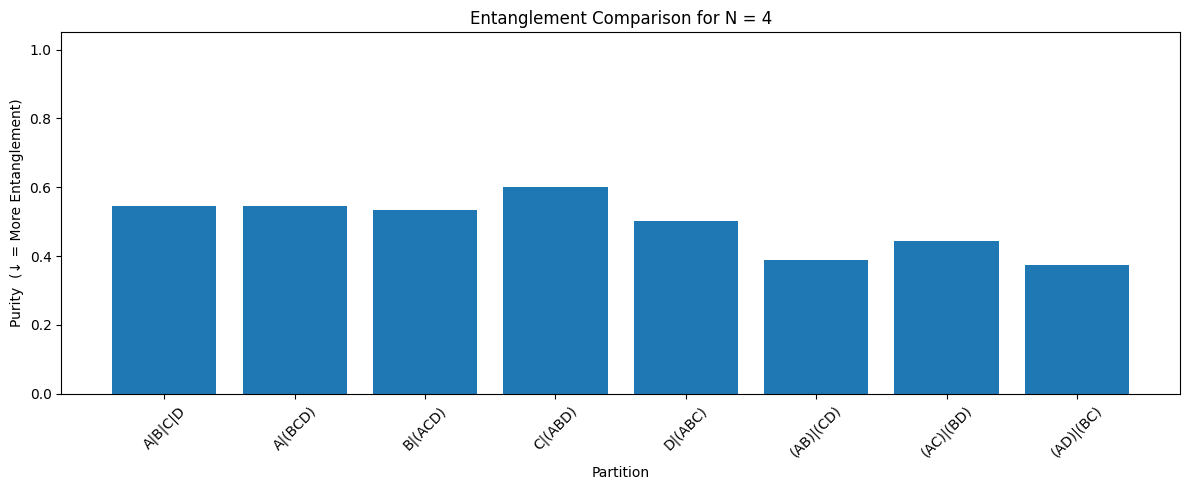

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import string


# --------------------------------------------------
# Build Product State
# --------------------------------------------------

def product_state(probabilities):
    psi = probabilities[0]

    for p in probabilities[1:]:
        psi = np.tensordot(psi, p, axes=0)

    return np.sqrt(psi)


# --------------------------------------------------
# Apply Diagonal Unitary (Random Phases)
# --------------------------------------------------

def apply_phases(psi, phase_tensor):
    return psi * np.exp(1j * phase_tensor)


# --------------------------------------------------
# Density Matrix
# --------------------------------------------------

def density_matrix(psi):

    psi_flat = psi.flatten()

    rho = np.outer(psi_flat, psi_flat.conj())

    return rho.reshape(psi.shape + psi.shape)


# --------------------------------------------------
# Partial Trace
# --------------------------------------------------

def partial_trace(rho, keep, dims):

    n = len(dims)

    trace_out = [i for i in range(n) if i not in keep]

    reshaped = rho

    for i in reversed(trace_out):

        reshaped = np.trace(
            reshaped,
            axis1=i,
            axis2=i + reshaped.ndim // 2
        )

    d = int(np.prod([dims[i] for i in keep]))

    return reshaped.reshape(d, d)


# --------------------------------------------------
# Purity
# --------------------------------------------------

def purity(rho):

    return np.real(np.trace(rho @ rho))


# --------------------------------------------------
# Partitions
# --------------------------------------------------

def partitions_human(n):

    labels = list(string.ascii_uppercase[:n])

    partitions = []

    # Fully local
    partitions.append((
        [[i] for i in range(n)],
        "|".join(labels)
    ))

    # Single vs rest
    for i in range(n):

        left = [i]
        right = [j for j in range(n) if j != i]

        label = f"{labels[i]}|({''.join(labels[j] for j in right)})"

        partitions.append(([left, right], label))


    # Balanced splits
    if n >= 4:

        seen = set()

        for r in range(2, n // 2 + 1):

            for combo in itertools.combinations(range(n), r):

                rest = tuple(i for i in range(n) if i not in combo)

                key = (combo, rest)

                if key in seen or (rest, combo) in seen:
                    continue

                seen.add(key)

                left = list(combo)
                right = list(rest)

                label = f"({''.join(labels[i] for i in left)})|({''.join(labels[i] for i in right)})"

                partitions.append(([left, right], label))

    return partitions


# --------------------------------------------------
# Theory Report (Adaptive)
# --------------------------------------------------

def print_theory_info(n, phases):

    dim = 2 ** n

    flat_phases = phases.flatten()

    labels = [format(i, f'0{n}b') for i in range(dim)]


    print("\n========== Quantum Operation Report ==========\n")

    print("System Information:")
    print(f"- Number of qubits (N)     : {n}")
    print(f"- Hilbert dimension       : 2^{n} = {dim}")

    print("\nComputational Basis:")

    show = min(8, dim)

    for i in range(show):
        print(f"|{labels[i]}⟩", end="   ")

    if dim > show:
        print("...")

    print("\n\nApplied Unitary:")

    print(f"U ∈ C^{dim}×{dim}")
    print("U = diag( e^{iθ₀}, e^{iθ₁}, ..., e^{iθ_{d−1}} )")

    print("\nOperator Properties:")
    print("- Structure   : Diagonal")
    print("- Type        : Global phase unitary")
    print("- Local       : No")
    print("- Mixing      : No")
    print("- Unitary     : Yes (U†U = I)")

    print("\nMathematical Form:")
    print("U = Σₖ exp(iθₖ) |k⟩⟨k|")

    print("\nPhase Statistics:")
    print(f"- Total phases : {len(flat_phases)}")
    print(f"- Mean(θ)      : {np.mean(flat_phases):.4f}")
    print(f"- Std(θ)       : {np.std(flat_phases):.4f}")

    print("\nSample Diagonal Elements:")

    sample = min(5, dim)

    for i in range(sample):

        val = np.exp(1j * flat_phases[i])

        print(f"U[{i},{i}] = exp(i·{flat_phases[i]:.3f}) = {val:.3f}")


    print("\nEntanglement Interpretation:")

    if n == 1:
        print("- Single qubit: No entanglement possible.")

    elif n == 2:
        print("- Bipartite system: Weak bipartite entanglement.")

    elif n == 3:
        print("- Tripartite system: Partial multipartite entanglement.")

    else:
        print(f"- {n}-partite system: Complex entanglement patterns.")

    print("- Only phase correlations generated.")
    print("- No amplitude redistribution.")
    print("- Maximal entanglement not reachable.")

    print("\nDensity Matrix Evolution:")
    print("ρ = U |ψ₀⟩⟨ψ₀| U†")

    print("\n=============================================\n")



# --------------------------------------------------
# Main Program
# --------------------------------------------------

def run():

    print("\n==== Multipartite Entanglement Simulator ====\n")

    n = int(input("Enter number of qubits (2,3,4,...): "))

    dims = [2] * n


    # Initial product state
    probabilities = [np.ones(2) / 2 for _ in range(n)]

    psi = product_state(probabilities)


    # Random diagonal unitary
    phases = 2 * np.pi * np.random.rand(*psi.shape)

    psi = apply_phases(psi, phases)


    # Print theory info
    print_theory_info(n, phases)


    # Density matrix
    rho = density_matrix(psi)


    labels_plot = []
    values_plot = []


    # Entanglement analysis
    for groups, label in partitions_human(n):

        keep = groups[0]

        rho_red = partial_trace(rho, keep, dims)

        p = purity(rho_red)

        labels_plot.append(label)
        values_plot.append(p)


    # Plot
    plt.figure(figsize=(12, 5))

    plt.bar(labels_plot, values_plot)

    plt.ylabel("Purity  (↓ = More Entanglement)")
    plt.xlabel("Partition")
    plt.title(f"Entanglement Comparison for N = {n}")

    plt.xticks(rotation=45)

    plt.ylim(0, 1.05)

    plt.tight_layout()

    plt.show()



# --------------------------------------------------
# Run
# --------------------------------------------------

if __name__ == "__main__":
    run()



==== Multipartite Entanglement Analyzer ====


========== Quantum Simulation Report ==========

Number of Qubits      : 5
Hilbert Dimension    : 32

Applied Operator:
U = diag( e^{iθ₀}, e^{iθ₁}, ..., e^{iθ_d} )
Global diagonal unitary

Phase Information:
Mean Phase  : 2.987
Std Phase   : 1.735

Entanglement Method:
Measure Used : Linear Entropy
E = 1 − Tr(ρ²)




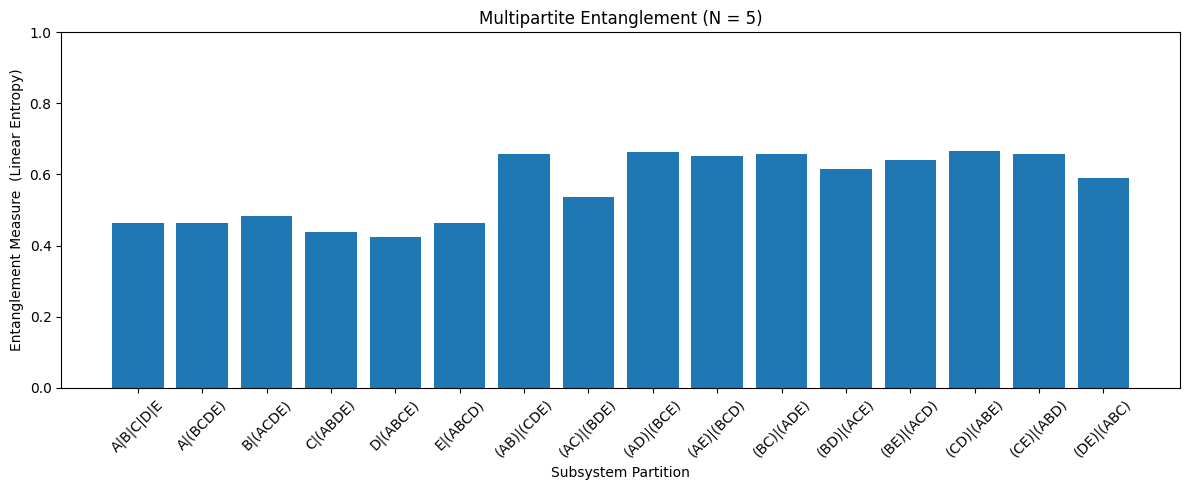

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import string


# --------------------------------------------------
# Build Initial Product State
# --------------------------------------------------

def build_product_state(n):

    probs = [np.ones(2) / 2 for _ in range(n)]

    psi = probs[0]

    for p in probs[1:]:
        psi = np.tensordot(psi, p, axes=0)

    return np.sqrt(psi)


# --------------------------------------------------
# Apply Global Diagonal Unitary
# --------------------------------------------------

def apply_diagonal_unitary(psi):

    phases = 2 * np.pi * np.random.rand(*psi.shape)

    U_diag = np.exp(1j * phases)

    psi_new = psi * U_diag

    return psi_new, phases


# --------------------------------------------------
# Density Matrix
# --------------------------------------------------

def get_density_matrix(psi):

    psi_flat = psi.flatten()

    rho = np.outer(psi_flat, psi_flat.conj())

    return rho.reshape(psi.shape + psi.shape)


# --------------------------------------------------
# Partial Trace
# --------------------------------------------------

def partial_trace(rho, keep, dims):

    n = len(dims)

    trace_out = [i for i in range(n) if i not in keep]

    reshaped = rho

    for i in reversed(trace_out):

        reshaped = np.trace(
            reshaped,
            axis1=i,
            axis2=i + reshaped.ndim // 2
        )

    d = int(np.prod([dims[i] for i in keep]))

    return reshaped.reshape(d, d)


# --------------------------------------------------
# Entanglement Measure (Linear Entropy)
# --------------------------------------------------

def entanglement_measure(rho):

    purity = np.real(np.trace(rho @ rho))

    E = 1 - purity

    return E


# --------------------------------------------------
# Generate Partitions
# --------------------------------------------------

def generate_partitions(n):

    labels = list(string.ascii_uppercase[:n])

    partitions = []

    # Fully local
    partitions.append((
        [[i] for i in range(n)],
        "|".join(labels)
    ))

    # One vs Rest
    for i in range(n):

        left = [i]
        right = [j for j in range(n) if j != i]

        label = f"{labels[i]}|({''.join(labels[j] for j in right)})"

        partitions.append(([left, right], label))


    # Balanced splits
    if n >= 4:

        seen = set()

        for r in range(2, n // 2 + 1):

            for combo in itertools.combinations(range(n), r):

                rest = tuple(i for i in range(n) if i not in combo)

                key = (combo, rest)

                if key in seen or (rest, combo) in seen:
                    continue

                seen.add(key)

                left = list(combo)
                right = list(rest)

                label = f"({''.join(labels[i] for i in left)})|({''.join(labels[i] for i in right)})"

                partitions.append(([left, right], label))

    return partitions


# --------------------------------------------------
# Print Adaptive Theory Report
# --------------------------------------------------

def print_report(n, phases):

    dim = 2 ** n

    print("\n========== Quantum Simulation Report ==========\n")

    print(f"Number of Qubits      : {n}")
    print(f"Hilbert Dimension    : {dim}")

    print("\nApplied Operator:")
    print("U = diag( e^{iθ₀}, e^{iθ₁}, ..., e^{iθ_d} )")
    print("Global diagonal unitary")

    print("\nPhase Information:")
    print(f"Mean Phase  : {np.mean(phases):.3f}")
    print(f"Std Phase   : {np.std(phases):.3f}")

    print("\nEntanglement Method:")
    print("Measure Used : Linear Entropy")
    print("E = 1 − Tr(ρ²)")

    print("\n==============================================\n")



# --------------------------------------------------
# Main Program
# --------------------------------------------------

def main():

    print("\n==== Multipartite Entanglement Analyzer ====\n")

    n = int(input("Enter number of qubits (2,3,4,...): "))

    dims = [2] * n


    # Initial State
    psi = build_product_state(n)


    # Apply Unitary
    psi, phases = apply_diagonal_unitary(psi)


    # Print Theory
    print_report(n, phases)


    # Density Matrix
    rho = get_density_matrix(psi)


    labels = []
    entanglement_vals = []


    # Analyze Partitions
    for groups, label in generate_partitions(n):

        keep = groups[0]

        rho_red = partial_trace(rho, keep, dims)

        E = entanglement_measure(rho_red)

        labels.append(label)
        entanglement_vals.append(E)


    # Plot
    plt.figure(figsize=(12, 5))

    plt.bar(labels, entanglement_vals)

    plt.ylabel("Entanglement Measure  (Linear Entropy)")
    plt.xlabel("Subsystem Partition")

    plt.title(f"Multipartite Entanglement (N = {n})")

    plt.xticks(rotation=45)

    plt.ylim(0, 1)

    plt.tight_layout()

    plt.show()



# --------------------------------------------------
# Run
# --------------------------------------------------
from mpl_toolkits.mplot3d import Axes3D


# --------------------------------------------------
# 3D Entanglement Landscape
# --------------------------------------------------

def plot_3d_entanglement(entanglement_vals, n):

    import numpy as np
    import matplotlib.pyplot as plt


    values = np.array(entanglement_vals)

    num = len(values)

    # Make square grid
    size = int(np.ceil(np.sqrt(num)))

    Z = np.zeros((size, size))
    Z[:] = np.nan


    k = 0
    for i in range(size):
        for j in range(size):

            if k < num:
                Z[i, j] = values[k]
                k += 1


    X, Y = np.meshgrid(
        np.arange(size),
        np.arange(size)
    )


    fig = plt.figure(figsize=(10, 8))

    ax = fig.add_subplot(111, projection='3d')


    surf = ax.plot_surface(
        X, Y, Z,
        cmap="viridis",
        edgecolor='none'
    )


    ax.set_xlabel("Partition Index X")
    ax.set_ylabel("Partition Index Y")
    ax.set_zlabel("Entanglement Strength")

    ax.set_title(f"3D Entanglement Landscape (N = {n})")


    fig.colorbar(
        surf,
        ax=ax,
        shrink=0.5,
        aspect=10,
        label="Entanglement"
    )


    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    main()



==== Multipartite Entanglement Analyzer ====



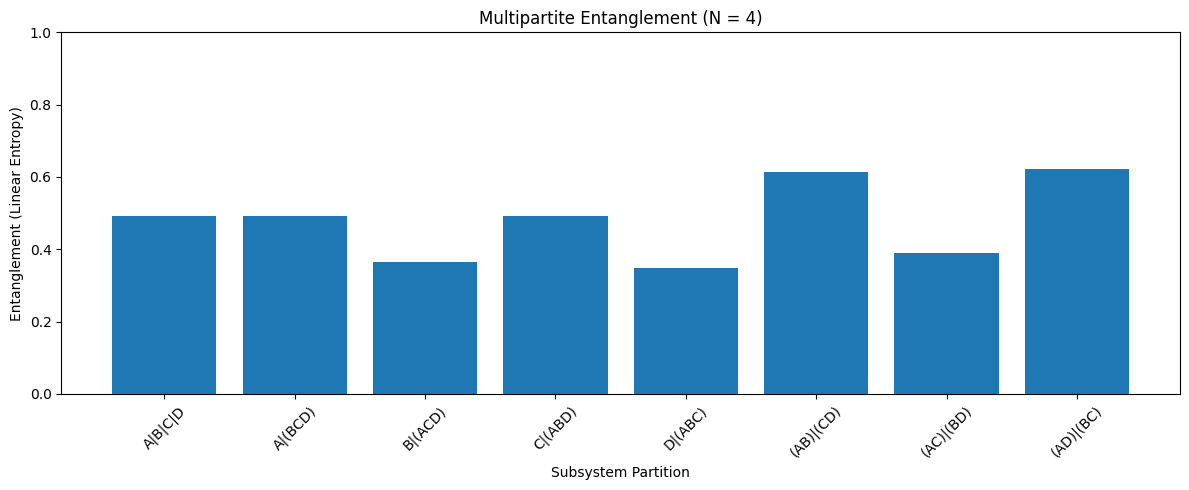

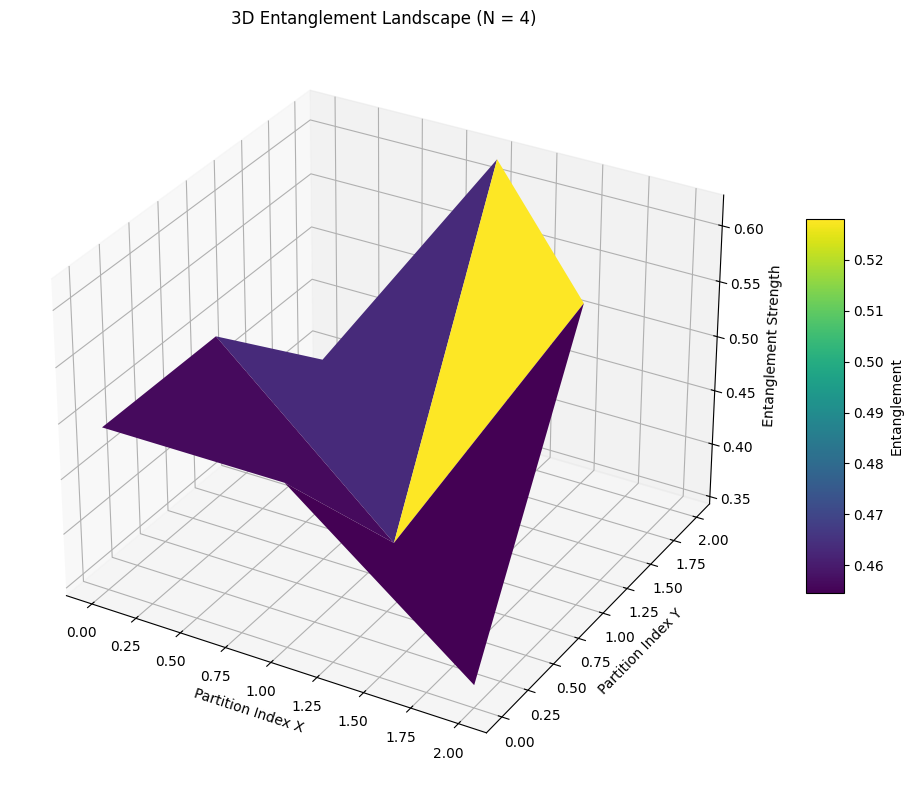

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import string
from mpl_toolkits.mplot3d import Axes3D


# --------------------------------------------------
# Build Initial Product State
# --------------------------------------------------

def build_product_state(n):

    probs = [np.ones(2) / 2 for _ in range(n)]

    psi = probs[0]

    for p in probs[1:]:
        psi = np.tensordot(psi, p, axes=0)

    return np.sqrt(psi)


# --------------------------------------------------
# Apply Global Diagonal Unitary
# --------------------------------------------------

def apply_diagonal_unitary(psi):

    phases = 2 * np.pi * np.random.rand(*psi.shape)

    U_diag = np.exp(1j * phases)

    psi_new = psi * U_diag

    return psi_new, phases


# --------------------------------------------------
# Density Matrix
# --------------------------------------------------

def get_density_matrix(psi):

    psi_flat = psi.flatten()

    rho = np.outer(psi_flat, psi_flat.conj())

    return rho.reshape(psi.shape + psi.shape)


# --------------------------------------------------
# Partial Trace
# --------------------------------------------------

def partial_trace(rho, keep, dims):

    n = len(dims)

    trace_out = [i for i in range(n) if i not in keep]

    reshaped = rho

    for i in reversed(trace_out):

        reshaped = np.trace(
            reshaped,
            axis1=i,
            axis2=i + reshaped.ndim // 2
        )

    d = int(np.prod([dims[i] for i in keep]))

    return reshaped.reshape(d, d)


# --------------------------------------------------
# Entanglement Measure (Linear Entropy)
# --------------------------------------------------

def entanglement_measure(rho):

    purity = np.real(np.trace(rho @ rho))

    E = 1 - purity

    return E


# --------------------------------------------------
# Generate Partitions
# --------------------------------------------------

def generate_partitions(n):

    labels = list(string.ascii_uppercase[:n])

    partitions = []


    # Fully local
    partitions.append((
        [[i] for i in range(n)],
        "|".join(labels)
    ))


    # One vs Rest
    for i in range(n):

        left = [i]
        right = [j for j in range(n) if j != i]

        label = f"{labels[i]}|({''.join(labels[j] for j in right)})"

        partitions.append(([left, right], label))


    # Balanced splits
    if n >= 4:

        seen = set()

        for r in range(2, n // 2 + 1):

            for combo in itertools.combinations(range(n), r):

                rest = tuple(i for i in range(n) if i not in combo)

                key = (combo, rest)

                if key in seen or (rest, combo) in seen:
                    continue

                seen.add(key)

                left = list(combo)
                right = list(rest)

                label = f"({''.join(labels[i] for i in left)})|({''.join(labels[i] for i in right)})"

                partitions.append(([left, right], label))


    return partitions


# --------------------------------------------------
# 3D Entanglement Landscape
# --------------------------------------------------

def plot_3d_entanglement(entanglement_vals, n):

    values = np.array(entanglement_vals)

    num = len(values)

    size = int(np.ceil(np.sqrt(num)))


    Z = np.zeros((size, size))
    Z[:] = np.nan


    k = 0
    for i in range(size):
        for j in range(size):

            if k < num:
                Z[i, j] = values[k]
                k += 1


    X, Y = np.meshgrid(
        np.arange(size),
        np.arange(size)
    )


    fig = plt.figure(figsize=(10, 8))

    ax = fig.add_subplot(111, projection="3d")


    surf = ax.plot_surface(
        X, Y, Z,
        cmap="viridis",
        edgecolor="none"
    )


    ax.set_xlabel("Partition Index X")
    ax.set_ylabel("Partition Index Y")
    ax.set_zlabel("Entanglement Strength")

    ax.set_title(f"3D Entanglement Landscape (N = {n})")


    fig.colorbar(
        surf,
        ax=ax,
        shrink=0.5,
        aspect=10,
        label="Entanglement"
    )


    plt.tight_layout()
    plt.show()


# --------------------------------------------------
# Main Program
# --------------------------------------------------

def main():

    print("\n==== Multipartite Entanglement Analyzer ====\n")

    n = int(input("Enter number of qubits (2,3,4,...): "))


    dims = [2] * n


    # Initial state
    psi = build_product_state(n)


    # Apply diagonal unitary
    psi, phases = apply_diagonal_unitary(psi)


    # Density matrix
    rho = get_density_matrix(psi)


    labels = []
    entanglement_vals = []


    # Analyze partitions
    for groups, label in generate_partitions(n):

        keep = groups[0]

        rho_red = partial_trace(rho, keep, dims)

        E = entanglement_measure(rho_red)

        labels.append(label)
        entanglement_vals.append(E)


    # ---------------- BAR PLOT ----------------

    plt.figure(figsize=(12, 5))

    plt.bar(labels, entanglement_vals)

    plt.ylabel("Entanglement (Linear Entropy)")
    plt.xlabel("Subsystem Partition")

    plt.title(f"Multipartite Entanglement (N = {n})")

    plt.xticks(rotation=45)

    plt.ylim(0, 1)

    plt.tight_layout()

    plt.show()


    # ---------------- 3D MOUNTAIN PLOT ----------------

    plot_3d_entanglement(entanglement_vals, n)



# --------------------------------------------------
# Run
# --------------------------------------------------

if __name__ == "__main__":

    main()
